In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
train = pd.read_csv('train_ctrUa4K.csv')
train.shape

(614, 13)

In [89]:
test = pd.read_csv('test_lAUu6dG.csv')
test.shape

(367, 12)

In [90]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [92]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [93]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


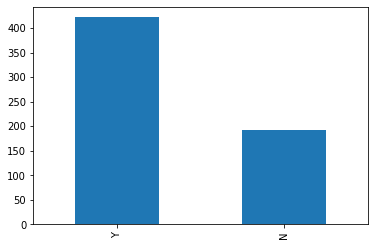

In [94]:
train.Loan_Status.value_counts().plot(kind = "bar")
plt.show()

In [95]:
print("The Approved (Y)Loan Ratio is {}".format(train.Loan_Status.value_counts()[0]/train.shape[0]))
print("The Rejected (N) Loan Ratio is {}".format(train.Loan_Status.value_counts()[1]/train.shape[0]))

The Approved (Y)Loan Ratio is 0.6872964169381107
The Rejected (N) Loan Ratio is 0.3127035830618892


In [96]:
train['Gender'] = train['Gender'].fillna(train['Gender'].value_counts().index[0])
train['Married'] = train['Married'].fillna(train['Married'].value_counts().index[0])
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].value_counts().index[0])
train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].value_counts().index[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())
train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mean())
train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [97]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [98]:
newtrain = train
newtrain = newtrain.drop('Loan_ID', axis = 1)

In [99]:
newtrain['TotalIncome']=newtrain['ApplicantIncome']+newtrain['CoapplicantIncome']
newtrain['Loan/Income']=newtrain['LoanAmount']/newtrain['TotalIncome']
newtrain['Loan/Term']=newtrain['LoanAmount']/newtrain['Loan_Amount_Term']
newtrain['RepaymentRatio']=(newtrain['Loan/Term']*1000)/newtrain['TotalIncome']

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
newtrain['Gender'] = le.fit_transform(newtrain['Gender'])
newtrain['Married'] = le.fit_transform(newtrain['Married'])
newtrain['Dependents'] = le.fit_transform(newtrain['Dependents'])
newtrain['Education'] = le.fit_transform(newtrain['Education'])
newtrain['Self_Employed'] = le.fit_transform(newtrain['Self_Employed'])
newtrain['Property_Area'] = le.fit_transform(newtrain['Property_Area'])
newtrain['Loan_Status'] = le.fit_transform(newtrain['Loan_Status'])
newtrain['Credit_History'] = le.fit_transform(newtrain['Credit_History'])

In [101]:
newtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan/Income,Loan/Term,RepaymentRatio
0,1,0,0,0,0,5849,0.0,146.412162,360.0,2,2,1,5849.0,0.025032,0.406700,0.069533
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,2,0,0,6091.0,0.021015,0.355556,0.058374
2,1,1,0,0,1,3000,0.0,66.000000,360.0,2,2,1,3000.0,0.022000,0.183333,0.061111
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,2,2,1,4941.0,0.024287,0.333333,0.067463
4,1,0,0,0,0,6000,0.0,141.000000,360.0,2,2,1,6000.0,0.023500,0.391667,0.065278


In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(newtrain[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])
newtrain[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']] = sc.transform(
    newtrain[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])


In [103]:
newtrain.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan/Income,Loan/Term,RepaymentRatio
0,1,0,0,0,0,0.072991,-0.554487,0.000000,0.279851,2,2,1,-0.182184,0.025032,0.406700,0.069533
1,1,1,1,0,0,-0.134412,-0.038732,-0.219273,0.279851,2,0,0,-0.144684,0.021015,0.355556,0.058374
2,1,1,0,0,1,-0.393747,-0.554487,-0.957641,0.279851,2,2,1,-0.623656,0.022000,0.183333,0.061111
3,1,1,0,1,0,-0.462062,0.251980,-0.314547,0.279851,2,2,1,-0.322885,0.024287,0.333333,0.067463
4,1,0,0,0,0,0.097728,-0.554487,-0.064454,0.279851,2,2,1,-0.158785,0.023500,0.391667,0.065278


In [104]:
test['Gender'] = test['Gender'].fillna(test['Gender'].value_counts().index[0])
test['Married'] = test['Married'].fillna(test['Married'].value_counts().index[0])
test['Dependents'] = test['Dependents'].fillna(test['Dependents'].value_counts().index[0])
test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].value_counts().index[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

In [105]:
newtest = test

In [106]:
newtest.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [107]:
newtest['TotalIncome']=newtest['ApplicantIncome']+newtest['CoapplicantIncome']
newtest['Loan/Income']=newtest['LoanAmount']/newtest['TotalIncome']
newtest['Loan/Term']=newtest['LoanAmount']/newtest['Loan_Amount_Term']
newtest['RepaymentRatio']=(newtest['Loan/Term']*1000)/newtest['TotalIncome']

In [108]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
newtest['Gender'] = le.fit_transform(newtest['Gender'])
newtest['Married'] = le.fit_transform(newtest['Married'])
newtest['Dependents'] = le.fit_transform(newtest['Dependents'])
newtest['Education'] = le.fit_transform(newtest['Education'])
newtest['Self_Employed'] = le.fit_transform(newtest['Self_Employed'])
newtest['Property_Area'] = le.fit_transform(newtest['Property_Area'])
newtest['Credit_History'] = le.fit_transform(newtest['Credit_History'])

In [109]:
newtest = newtest.drop('Loan_ID', axis = 1)
newtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan/Income,Loan/Term,RepaymentRatio
0,1,1,0,0,0,5720,0,110.0,360.0,2,2,5720,0.019231,0.305556,0.053419
1,1,1,1,0,0,3076,1500,126.0,360.0,2,2,4576,0.027535,0.350000,0.076486
2,1,1,2,0,0,5000,1800,208.0,360.0,2,2,6800,0.030588,0.577778,0.084967
3,1,1,2,0,0,2340,2546,100.0,360.0,1,2,4886,0.020467,0.277778,0.056852
4,1,0,0,1,0,3276,0,78.0,360.0,2,2,3276,0.023810,0.216667,0.066138


In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(newtest[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])
newtest[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']] = sc.transform(
    newtest[['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome','Loan_Amount_Term']])


In [111]:
newtest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan/Income,Loan/Term,RepaymentRatio
0,1,1,0,0,0,0.186461,-0.673335,-0.429368,0.270603,2,2,-0.126182,0.019231,0.305556,0.053419
1,1,1,1,0,0,-0.352692,-0.029848,-0.166482,0.270603,2,2,-0.346506,0.027535,0.350000,0.076486
2,1,1,2,0,0,0.039641,0.098849,1.180807,0.270603,2,2,0.081817,0.030588,0.577778,0.084967
3,1,1,2,0,0,-0.502774,0.418877,-0.593671,0.270603,1,2,-0.286803,0.020467,0.277778,0.056852
4,1,0,0,1,0,-0.311909,-0.673335,-0.955139,0.270603,2,2,-0.596875,0.023810,0.216667,0.066138


In [112]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [113]:
cv = StratifiedKFold(n_splits= 5, random_state= 5)

C:\Users\Akshay\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [114]:
x = newtrain.drop('Loan_Status', axis = 1)
y = newtrain['Loan_Status']

In [115]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
parameters ={"learning_rate":[0.1,0.2,0.3],"max_depth":[4,5,6,7],"min_child_weight":[1, 3, 5, 7],"random_state":[1,2,3,4]}
classifier = XGBClassifier(n_estimators=30)
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,
                           n_jobs=1)
grid_search.fit(x, y)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=30, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7],
                         'min_child_weight': [1, 3, 5, 7],
          

In [116]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_weight': 3,
 'random_state': 1}

In [117]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [118]:
grid_search.best_score_


0.8111316763617132

In [119]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=30, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

xgb.fit(x, y)

xgb_pred = xgb.predict(newtest)
print("Training Accuracy :", xgb.score(x, y))

solution = pd.DataFrame({'Loan_ID': test.Loan_ID,'Loan_Status': np.vectorize(lambda s: 'Y' if s==1 else 'N')(xgb_pred)})
solution.to_csv('New XGB.csv', index = False)

Training Accuracy : 0.8436482084690554
